In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree 

In [2]:
df=sns.load_dataset("titanic")

In [3]:
x=df[['pclass' ,'sex' ,'age' ,'sibsp' ,'parch' ,'fare']]
y=df['survived']

In [4]:
x=pd.get_dummies(x,columns=['sex'])

In [5]:
x.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [6]:
x.age.fillna(value=x['age'].mean() ,inplace=True)

In [8]:
x_train ,x_test ,y_train ,y_test =train_test_split(x,y,test_size=0.2)

In [9]:
model=DecisionTreeClassifier()
model.fit(x_train ,y_train)


DecisionTreeClassifier()

In [10]:
y_pred =model.predict(x_test)

In [11]:
print("Accuracy:" ,accuracy_score(y_test ,y_pred))

Accuracy: 0.7988826815642458


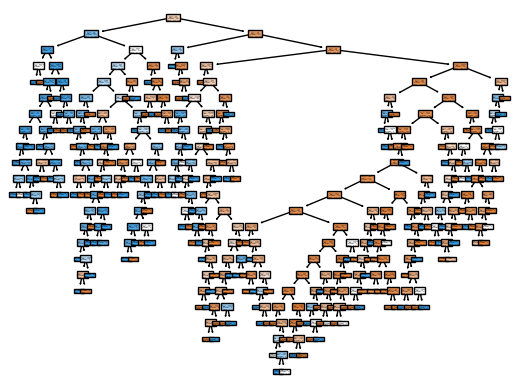

<Figure size 640x480 with 0 Axes>

In [12]:
tree.plot_tree(model.fit(x,y) ,filled=True)
plt.show()
plt.savefig("tree.png")

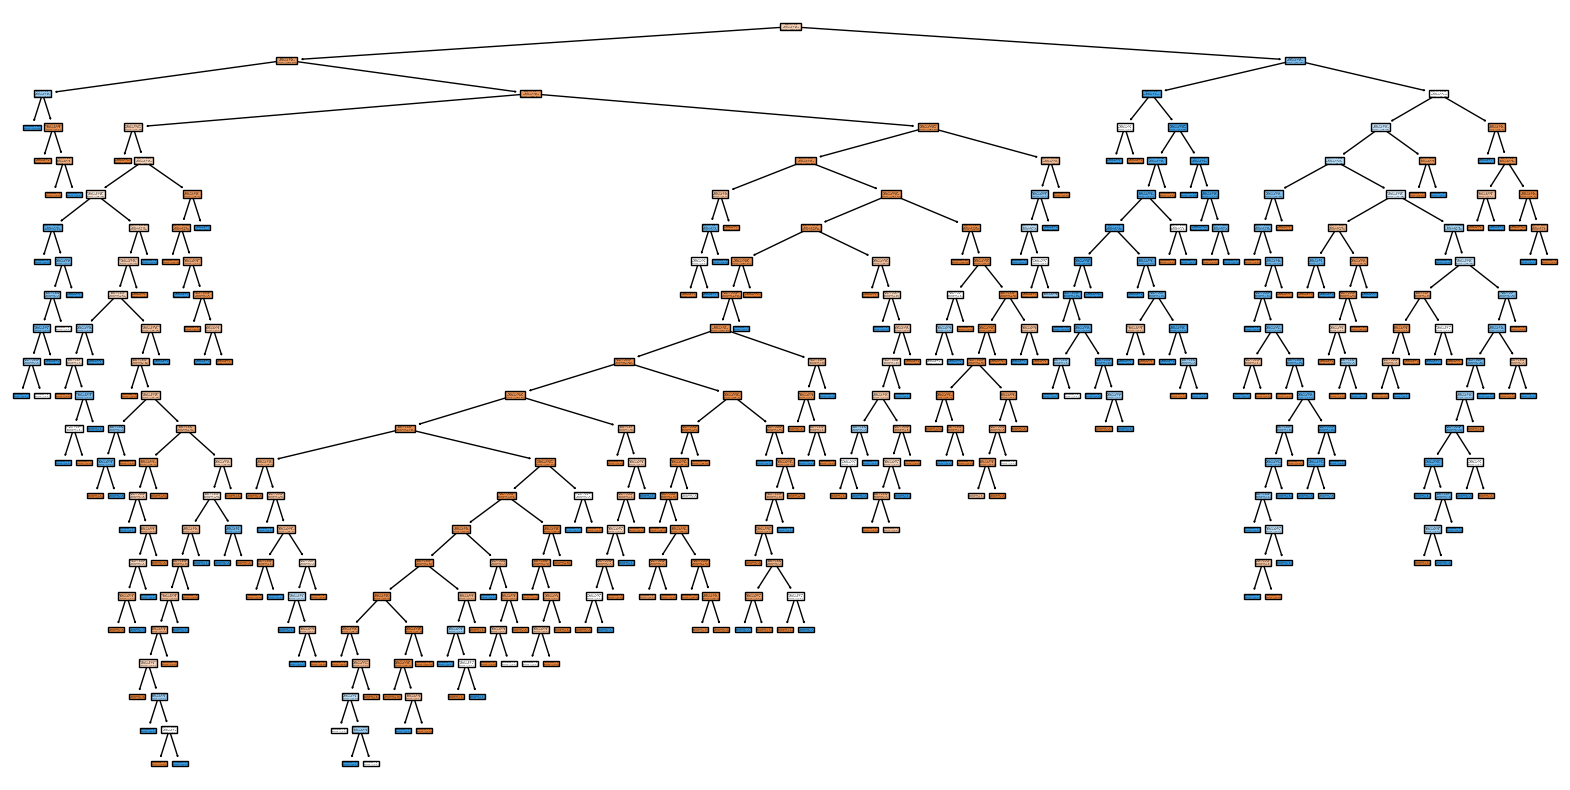

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(x,y) ,filled=True)
plt.show()
plt.savefig("decision_tree.pdf" ,format="pdf" ,dpi=300)

In [14]:
# precission
from sklearn.metrics import precision_score ,recall_score,f1_score
precision_score(y_test ,y_pred)

0.6714285714285714

In [15]:
recall_score(y_test ,y_pred)

0.7833333333333333

In [16]:
f1_score(y_test ,y_pred)

0.7230769230769231

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_pred)
cm

array([[96, 23],
       [13, 47]], dtype=int64)

<AxesSubplot: >

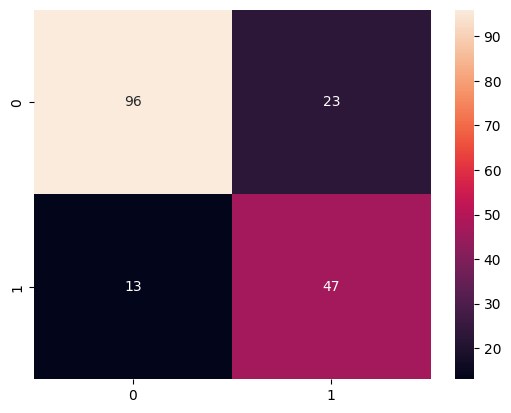

In [21]:
sns.heatmap(cm ,annot=True)

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train ,y_train)
y_pred =model.predict(x_test)
cm = confusion_matrix(y_test ,y_pred)
print("confusion Matrix:" , cm)
print("precision score:" ,precision_score(y_test ,y_pred))
print("recall_score:" ,recall_score(y_test ,y_pred))
print("f1 score:" ,f1_score(y_test ,y_pred))



confusion Matrix: [[102  17]
 [ 13  47]]
precision score: 0.734375
recall_score: 0.7833333333333333
f1 score: 0.7580645161290323


## Logistics Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train ,y_train)
y_pred =model.predict(x_test)
cm = confusion_matrix(y_test ,y_pred)
print("confusion Matrix:" , cm)
print("precision score:" ,precision_score(y_test ,y_pred))
print("recall_score:" ,recall_score(y_test ,y_pred))
print("f1 score:" ,f1_score(y_test ,y_pred))

confusion Matrix: [[98 21]
 [19 41]]
precision score: 0.6612903225806451
recall_score: 0.6833333333333333
f1 score: 0.6721311475409835


## SVM support vector machine

In [27]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train ,y_train)
y_pred =model.predict(x_test)
cm = confusion_matrix(y_test ,y_pred)
print("confusion Matrix:" , cm)
print("precision score:" ,precision_score(y_test ,y_pred))
print("recall_score:" ,recall_score(y_test ,y_pred))
print("f1 score:" ,f1_score(y_test ,y_pred))

confusion Matrix: [[100  19]
 [ 37  23]]
precision score: 0.5476190476190477
recall_score: 0.38333333333333336
f1 score: 0.4509803921568628


## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train ,y_train)
y_pred =model.predict(x_test)
cm = confusion_matrix(y_test ,y_pred)
print("confusion Matrix:" , cm)
print("precision score:" ,precision_score(y_test ,y_pred))
print("recall_score:" ,recall_score(y_test ,y_pred))
print("f1 score:" ,f1_score(y_test ,y_pred))

confusion Matrix: [[103  16]
 [ 21  39]]
precision score: 0.7090909090909091
recall_score: 0.65
f1 score: 0.6782608695652174


In [30]:
# libraries and model import
import numpy as np
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# define the models
models= [LogisticRegression() ,KNeighborsClassifier() ,RandomForestClassifier(),SVC()]
names=["Logistic Regression" ,"KNN" ,"Random Forest" ,"SVM"]


# perform K-fold cross validation for each model
k=10
for name,model in zip(names ,models):
    cv_scores =cross_val_score(model ,x_train ,y_train ,cv=k)
    print(f"{name} CV Accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")

c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Logistic Regression CV Accuracy: 0.789 +/- 0.063
KNN CV Accuracy: 0.719 +/- 0.061
Random Forest CV Accuracy: 0.813 +/- 0.052
SVM CV Accuracy: 0.673 +/- 0.041
